In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from windrose import WindroseAxes

In [3]:
#Lien des données, à maj en fonction du gitlab
mesures_canyon = r'ClimaBat_2canyon_07-23-2012 to 08-26-2012_corrige.xlsx'
mesures_MF = r'meteo_2012-01-01 au 2013-01-01.xlsx'
mesures_aeroport = r'fichier_meteo_aeroport_la_rochelle\data.xlsx'

donnees_canyon = pd.read_excel(mesures_canyon,index_col='TIMESTAMP')   #pas de temps : 5min
donnees_MF=pd.read_excel(mesures_MF, index_col='TimeStepLOC')      #pas de temps : 30min
donnees_aeroport = pd.read_excel(mesures_aeroport,index_col='time')    #pas de temps : 1H

In [4]:
#CONVERSION km/h-> m/s
donnees_MF['WindSpd'] = donnees_MF['WindSpd']/3.6

In [5]:
#permet de choisir une période commune aux trois fichiers
donnees_canyon1H = donnees_canyon.resample('1H').mean()

In [6]:
# parametres de la figure
mybins = [0., 1.5, 3, 4.5, 6,7.5, 9, ]
#mybins= np.arange(0,40,4)
t_debut = donnees_canyon1H.index.min()
t_fin = donnees_canyon1H.index.max()

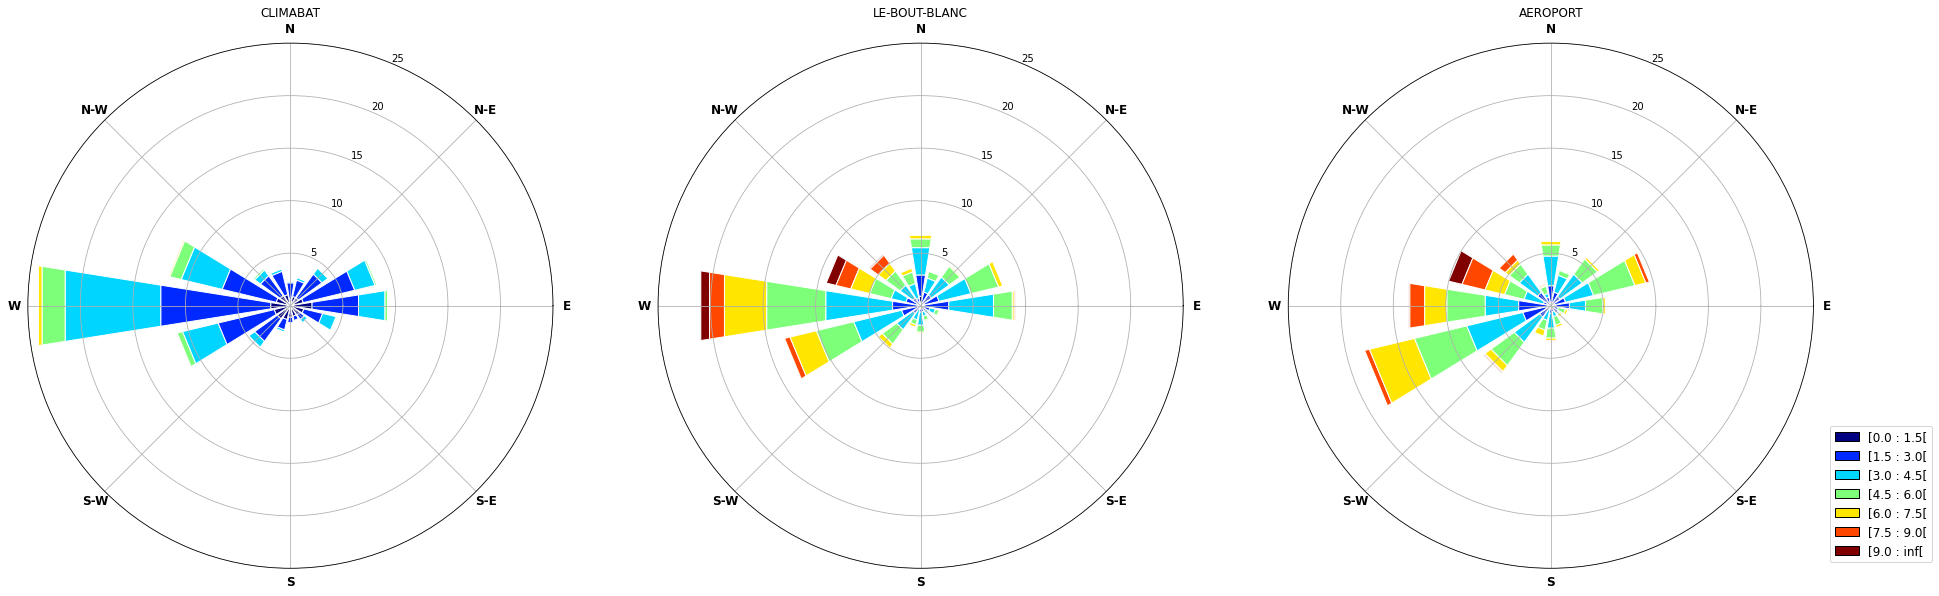

In [7]:
fig = plt.figure(figsize=(32,18))

#CLIMABAT
ax = fig.add_subplot(131, projection="windrose", rmax= 25)
wd = donnees_canyon.WindDir[t_debut:t_fin]
ws = donnees_canyon.WS_ms[t_debut:t_fin]

#ax.contourf(wd, ws, bins=mybins, edgecolor='white',normed=True,fontsize=12, fontweight='bold' )
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white',bins= mybins )
ax.set_xticklabels(["E", "N-E", "N", "N-W", "W", "S-W", "S", "S-E"], fontsize=12, fontweight='bold')
titre='CLIMABAT'
plt.title(titre)
#ax.set_legend()

#TOIT
ax = fig.add_subplot(132, projection="windrose", rmax= 25)
wd = donnees_MF.loc[t_debut:t_fin,'WindDir']
ws = donnees_MF.loc[t_debut:t_fin,'WindSpd']

ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white', bins = mybins)
ax.set_xticklabels(["E", "N-E", "N", "N-W", "W", "S-W", "S", "S-E"], fontsize=12, fontweight='bold')
titre='LE-BOUT-BLANC'
plt.title(titre)
#ax.set_legend()

#AEROPORT
ax = fig.add_subplot(133, projection="windrose", rmax= 25)

wd = donnees_aeroport.loc[t_debut:t_fin,'wind_dir']
ws = donnees_aeroport.loc[t_debut:t_fin,'wind_speed']

ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white', bins = mybins)
ax.set_xticklabels(["E", "N-E", "N", "N-W", "W", "S-W", "S", "S-E"], fontsize=12, fontweight='bold')
titre='AEROPORT'
plt.title(titre)
ax.legend(bbox_to_anchor=(1.02, 0), fontsize = 'large')

plt.savefig('windrose_comparaison.png')